## **Data Cleaning & Preprocessing**

*   **Objective:** Learn how to clean and prepare raw data for ML.
*   **Tools:** Python, Pandas, NumPy, Matplotlib/Seaborn






1.   Import the dataset and explore basic info (nulls, data types)
2.   Handle missing values using mean/median/imputation.
3.   Convert categorical features into numerical using encoding
4.   Normalize/standardize the numerical features.
5.   Visualize outliers using boxplots and remove them.



**Import the dataset and explore basic info (nulls, data types)**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Handle missing values using mean/median/imputation.**

Compare mean vs. median (check skewness, decide best imputation method).



In [6]:
mean_age = df["Age"].mean()
median_age = df["Age"].median()
skew_age = df["Age"].skew()

print("Mean of Ages:", mean_age)
print("Median of Ages", median_age)
print("Skewness of Ages",skew_age)

Mean of Ages: 29.69911764705882
Median of Ages 28.0
Skewness of Ages 0.38910778230082704


Min-Max Range

In [7]:
min_age = df["Age"].min()
max_age = df["Age"].max()

print("Minimum Age:", min_age)
print("Maximum Age:", max_age)

Minimum Age: 0.42
Maximum Age: 80.0


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())



In [9]:
df['Age'].isnull().sum()


np.int64(0)

In [10]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:

print(df['Embarked'].isnull().sum())


2


In [13]:
mode_embarked = df['Embarked'].mode()[0]
print(f"Mode of Embarked: {mode_embarked}")


Mode of Embarked: S


In [14]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked)



In [15]:
print(df['Embarked'].isnull().sum())


0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Encode Categorical Features**

In [17]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [18]:
df['Sex'].value_counts()


,count
Sex,
0,577
1,314


In [19]:
# One-Hot Encode the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Concatenate the new dummy columns to the original dataframe
df = pd.concat([df, embarked_dummies], axis=1)

# Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# Check the result
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,False,True


**Standardize Numerical Features**

In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


In [21]:
from sklearn.preprocessing import StandardScaler

# Standardizing Age and Fare
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Check the result
df[['Age', 'Fare']].head()


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


**Visualize and Remove Outliers**

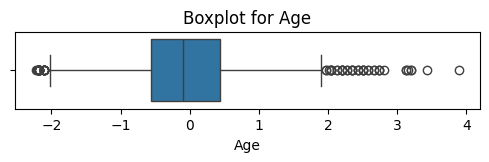

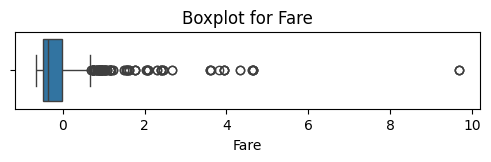

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Age', 'Fare']

# 1. Boxplot to visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

In [23]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


**Final Cleanup**

In [24]:
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# 3. Drop 'Cabin' if still present
df = df.drop(columns=['Cabin'], errors='ignore')

# 4. Final cleaned and preprocessed data
print("Cleaned Data:")
print(df.head(1))


Cleaned Data:
   PassengerId  Survived  Pclass                     Name  Sex       Age  \
0            1         0       3  Braund, Mr. Owen Harris    0 -0.565736   

   SibSp  Parch     Ticket      Fare  Embarked_C  Embarked_Q  Embarked_S  
0      1      0  A/5 21171 -0.502445       False       False        True  


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  718 non-null    int64  
 1   Survived     718 non-null    int64  
 2   Pclass       718 non-null    int64  
 3   Name         718 non-null    object 
 4   Sex          718 non-null    int64  
 5   Age          718 non-null    float64
 6   SibSp        718 non-null    int64  
 7   Parch        718 non-null    int64  
 8   Ticket       718 non-null    object 
 9   Fare         718 non-null    float64
 10  Embarked_C   718 non-null    bool   
 11  Embarked_Q   718 non-null    bool   
 12  Embarked_S   718 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(2)
memory usage: 63.8+ KB


**Save the Cleaned Dataset**

In [25]:
df.to_csv('cleaned_titanic_data.csv', index=False)